In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from script import FrankeFunction


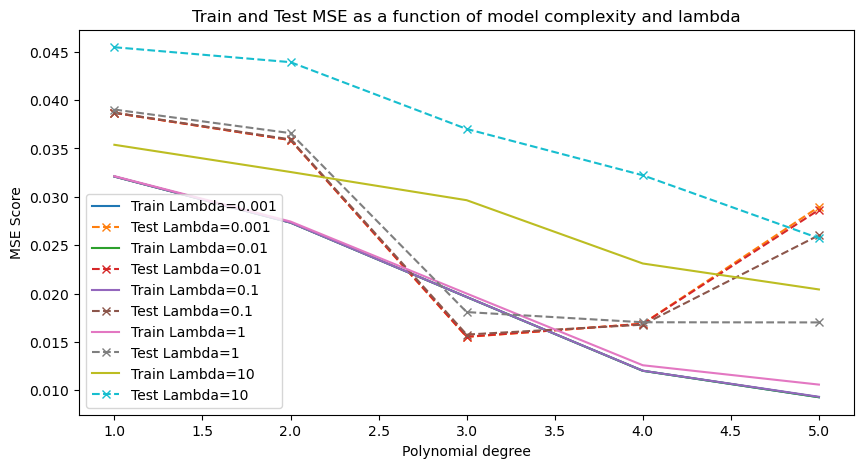

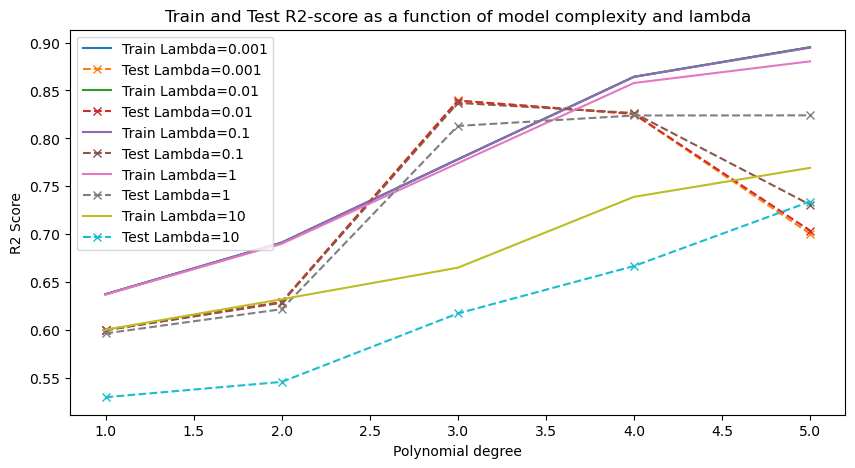

In [11]:
# Generate data
np.random.seed(42)
n = 100
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))

# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)


lambda_values = [0.001, 0.01, 0.1, 1, 10]
r2_values = {lmb: [] for lmb in lambda_values}
mse_values = {lmb: [] for lmb in lambda_values}
mse_values_test = {lmb: [] for lmb in lambda_values}
r2_values_test = {lmb: [] for lmb in lambda_values}
degrees = range(1,6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    for lmb in lambda_values:
      beta_ridge = np.linalg.inv(x_train_poly.T @ x_train_poly + lmb*np.eye(x_train_poly.shape[1])) @ x_train_poly.T @ z_train
      
      #pred of train and test
      z_pred_train = x_train_poly @ beta_ridge
      z_pred_test = x_test_poly @ beta_ridge

      mse_train = mean_squared_error(z_train, z_pred_train)
      r2_train = r2_score(z_train, z_pred_train)
      mse_test = mean_squared_error(z_test, z_pred_test)
      r2_test = r2_score(z_test, z_pred_test)

      mse_values_test[lmb].append(mse_test)
      r2_values_test[lmb].append(r2_test)
      mse_values[lmb].append(mse_train)
      r2_values[lmb].append(r2_train)

plt.figure(figsize=(10,5))
for lmb in lambda_values:
    plt.plot(degrees, mse_values[lmb], linestyle='-' ,label=f"Train Lambda={lmb}")
    plt.plot(degrees, mse_values_test[lmb], linestyle='--', marker='x', label=f"Test Lambda={lmb}")

plt.xlabel("Polynomial degree")
plt.ylabel("MSE Score")
plt.title("Train and Test MSE as a function of model complexity and lambda")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for lmb in lambda_values:
    plt.plot(degrees, r2_values[lmb], label=f"Train Lambda={lmb}")
    plt.plot(degrees, r2_values_test[lmb],linestyle='--', marker='x', label=f"Test Lambda={lmb}")

plt.xlabel("Polynomial degree")
plt.ylabel("R2 Score")
plt.title("Train and Test R2-score as a function of model complexity and lambda")
plt.legend()
plt.show()



### Discussion.
We observe that the ridge regression behave quite similar to the OLS regression for the chosen lambda values up to poly-degree 5.  We do see a clear trend that for all lamdba values, the R2-score moves towards 1 and mse moves towards 0, just as we want. This means that our model makes a good fit.

We also notice that when i decrease the number of data used (n-value) the error metrics decrease. And with higher lambdas the model performs worse. 

When we look at the plots for mse and r2 for both train and test we can better see how our model perform. Both train and test are quite similar to each other for the same lamdbas. 

We still see that lower order result in higher error, and values further away from 1 (r2-score). Likely due to lower order does not capture the complexity. However, we might risk overfitting if the model learns noise rather than the underlying patterns. 

Since both train and test are similar, we can assume the model is generalizing well. We could also think that overfitting won't happend becuase of this genralization.



 